# 6.4 Machine Learning

1. Install the scikit-learn library.

2.Import the libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [13]:
#Create a path
path = r'C:\Users\beaac\Desktop\Chocolate Bars'

In [17]:
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Flavors_Of_Cacao_cleaned.csv'))

3. Data Cleaning

In [20]:
df.columns

Index(['Unnamed: 0', 'Company  (Maker-if known)', 'Bar_Name', 'REF',
       'Review_Date', 'Cocoa_Percent', 'Location', 'Rating', 'Bean_Type',
       'Bean_Origin'],
      dtype='object')

In [22]:
# drop ' Unnamed column'
df.drop(columns=['Unnamed: 0'], inplace=True)


In [24]:
# Rename columns
df.rename(columns={
    'Company\u00A0 (Maker-if known)': 'Company',
    'Bar_Name': 'BarName',
    'REF': 'Ref',
    'Review_Date': 'ReviewDate',
    'Cocoa_Percent': 'CocoaPercent',
    'Location': 'CompanyLocation',
    'Rating': 'Rating',
    'Bean_Type': 'BeanType',
    'Bean_Origin': 'BeanOrigin'
}, inplace=True)


In [26]:
df.columns

Index(['Company', 'BarName', 'Ref', 'ReviewDate', 'CocoaPercent',
       'CompanyLocation', 'Rating', 'BeanType', 'BeanOrigin'],
      dtype='object')

In [32]:
df.info

<bound method DataFrame.info of        Company             BarName   Ref  ReviewDate  CocoaPercent  \
0     A. Morin         Agua Grande  1876        2016          63.0   
1     A. Morin               Kpime  1676        2015          70.0   
2     A. Morin              Atsane  1676        2015          70.0   
3     A. Morin               Akata  1680        2015          70.0   
4     A. Morin              Quilla  1704        2015          70.0   
...        ...                 ...   ...         ...           ...   
1790    Zotter                Peru   647        2011          70.0   
1791    Zotter               Congo   749        2011          65.0   
1792    Zotter        Kerala State   749        2011          65.0   
1793    Zotter        Kerala State   781        2011          62.0   
1794    Zotter  Brazil, Mitzi Blue   486        2010          65.0   

     CompanyLocation  Rating   BeanType BeanOrigin  
0             France    3.75    Unknown   Sao Tome  
1             France 

In [36]:
df.head()

,Company,BarName,Ref,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BeanOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru


In [50]:
#finding missing values
df.isnull().sum()


Company            0
BarName            0
Ref                0
ReviewDate         0
CocoaPercent       0
CompanyLocation    0
Rating             0
BeanType           0
BeanOrigin         0
dtype: int64

In [52]:
# filling missing values with " Unknow"
df['BeanType'] = df['BeanType'].fillna('Unknown')
df['BeanOrigin'] = df['BeanOrigin'].fillna('Unknown')


In [46]:
df.isnull().sum()

Company            0
BarName            0
Ref                0
ReviewDate         0
CocoaPercent       0
CompanyLocation    0
Rating             0
BeanType           0
BeanOrigin         0
dtype: int64

In [54]:
# checking for duplicates
df.duplicated().sum()


0

Data has being cleanned

4.Explore data visualizations


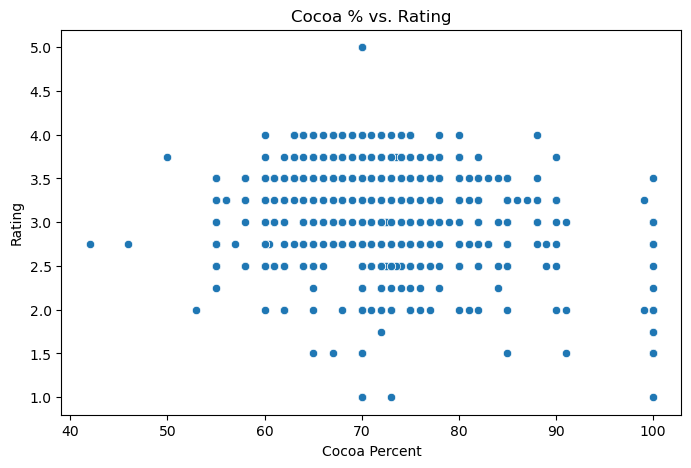

In [59]:
# Im testing the variables CocoaPercent and Rating

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CocoaPercent', y='Rating')
plt.title('Cocoa % vs. Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()


Hypothesis:
- If the ratings are lower, then the cocoa percent in the chocolate is high


Note 1: CocoaPercent vs. Rating isn’t revealing much, that suggests the relationship might be weak or nonlinear.


TUTOR ADVIDE: Yes you have a few options. You can supplement your dataset with an external dataset or you can choose a different but similar dataset for this step and not include the one you have right now so you can complete the task. I will leave the choice up to you!

OPTION 2: Choose an external dataset 